In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk

In [2]:
car_data=pd.read_excel("D:\Data_Train.xlsx")
car_test_data=pd.read_excel("D:\Data_Test.xlsx")

Now let us see our datasets.

In [3]:
car_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In our training dataset we have both categorical and numerical data. We can divide our data as follows:

Independent variables:

1. Categorical variables: Location, Fuel_type, Transmission, Owner_Type,Seats
2. Numerical variables:Year, Kilometers_Driven, Mileage, Engine, Power
3. Nomianl variabe: Name

Dependent variables:

Price (Numerical variable)

In [4]:
car_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
car_test_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [6]:
car_test_data.describe()

,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1223.000000
mean,2013.400324,58507.288493,5.284546
std,3.179700,35598.702098,0.825622
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


Let us check if there are NULL values in our test and train dataset.

In [7]:
car_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [8]:
car_test_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [5]:
car_test_data[car_test_data['Power']=='null bhp']['Power'].count()

22

In [6]:
car_data[car_data['Power']=='null bhp']['Power'].count()

107

We can that training data has 107 rows and test data has 22 rows have null bhp in Power column which are not treated as null values. We need to convert them to null values

In [4]:
car_data['Power']=car_data['Power'].replace(to_replace="[null]" , value = np.NaN , regex = True)
car_test_data['Power']=car_test_data['Power'].replace(to_replace="[null]" , value = np.NaN , regex = True)
car_data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [5]:
car_test_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                32
Seats                11
dtype: int64

We can see that there are few columns with null elements in both train and test datasets. We must remove these null objects. Engine, Power, Seats colums have null values in both train and test datasets, Mileage columns in Training dataset contains 2 null values, since all these are numerical data, we can either take mean medain or mode. Mean might be influence by presence of outliers, hence we can take median or mode.

In [6]:
car_data['Mileage'].fillna(car_data['Mileage'].mode()[0] , inplace = True)
car_data['Engine'].fillna(car_data['Engine'].mode()[0] , inplace = True)
car_data['Power'].fillna(car_data['Power'].mode()[0] , inplace = True)
car_data['Seats'].fillna(car_data['Seats'].mode()[0] , inplace = True)
car_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [7]:
car_test_data['Engine'].fillna(car_test_data['Engine'].mode()[0] , inplace = True)
car_test_data['Power'].fillna(car_test_data['Power'].mode()[0] , inplace = True)
car_test_data['Seats'].fillna(car_test_data['Seats'].mode()[0] , inplace = True)
car_test_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [8]:
#removing the units in some columns of the  training dataset
car_data['Mileage'] = car_data['Mileage'].str.split(" " , expand = True)
car_data['Mileage'] = car_data['Mileage'].astype("float")


In [9]:
#repeatig the above steps for the other columns
car_data['Engine'] = car_data['Engine'].str.split(" " , expand = True)
car_data['Engine'] = car_data['Engine'].astype("float")
car_data['Power'] = car_data['Power'].str.split(" " , expand = True)
car_data['Power'] = car_data['Power'].astype("float")
car_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [10]:
#removing the units in some columns of the testing dataset
car_test_data['Mileage'] = car_test_data['Mileage'].str.split(" " , expand = True)
car_test_data['Mileage'] = car_test_data['Mileage'].astype("float")
car_test_data['Engine'] = car_test_data['Engine'].str.split(" " , expand = True)
car_test_data['Engine'] = car_test_data['Engine'].astype("float")
car_test_data['Power'] = car_test_data['Power'].str.split(" " , expand = True)
car_test_data['Power'] = car_test_data['Power'].astype("float")
car_test_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,74.00,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0


In [14]:
#Let us check the name variable 
print("The total number of unqiue car :",str(len(car_data['Name'].unique())))

The total number of unqiue car : 1876


In [20]:
#since there are 1876 car and it will be diffcult upon us to study each car type and the realation
#with other vairables lets define a new column with the name brand
car_data['Brand']=car_data['Name'].str.split(" ",1)
car_data['Brand']=car_data['Brand'].str.get(0)
print("The total number of unqiue car Brands :",str(len(car_data['Brand'].unique())))

The total number of unqiue car Brands : 31


In [16]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
 12  Brand              6019 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 611.4+ KB


Now that we have cleaned and prepared our data, let us check the relation between the variables :
## Exploratory Data Analysis

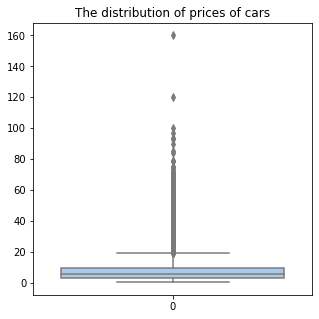

In [21]:
plt.rcParams["figure.figsize"]=[5,5]
plt.title("The distribution of prices of cars")
#for checking outliers if they exist
sb.boxplot(data=car_data['Price'],palette="pastel")


As we can most of the cars were sold below 50 Lakhs.

Let us see the distribution of dependent variables(categorical)

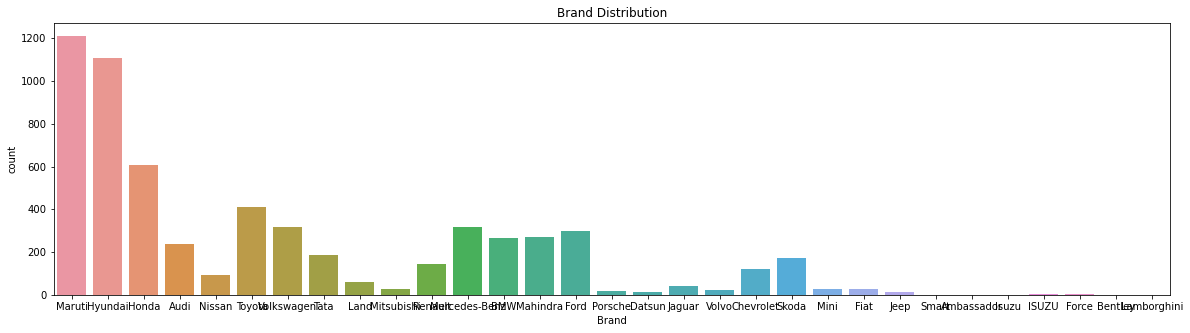

In [22]:
#We make use of pie charts to represent the fields in each category
plt.figure(figsize=(20,5))

c1=['orange','skyblue','yellow','lawngreen','violet','gold',]
c2=['hotpink','lime','red','sandybrown','grey']
plt.title("Brand Distribution")
sb.countplot(x=car_data['Brand'])


Most numbers of car sold belonged to Brand Maruti followed by Hyundai and Honda

Text(0.5, 1.0, 'Seats distribution')

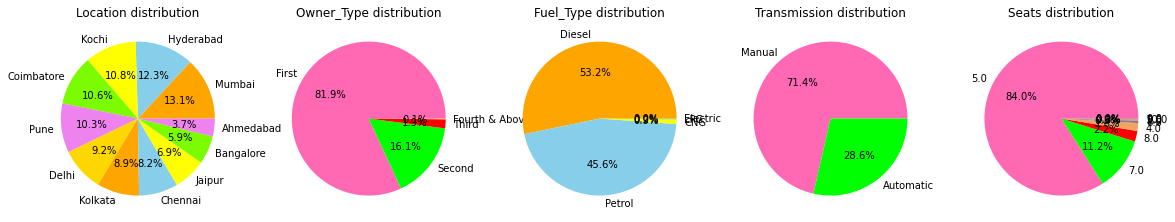

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
glab=car_data['Location'].value_counts().index
gval=car_data['Location'].value_counts().values
plt.pie(gval,labels=glab,colors=c1,autopct='%1.1f%%')
plt.title("Location distribution")
plt.subplot(1,5,2)
glab=car_data['Owner_Type'].value_counts().index
gval=car_data['Owner_Type'].value_counts().values
plt.pie(gval,labels=glab,colors=c2,autopct='%1.1f%%')
plt.title("Owner_Type distribution")
plt.subplot(1,5,3)
glab=car_data['Fuel_Type'].value_counts().index
gval=car_data['Fuel_Type'].value_counts().values
plt.pie(gval,labels=glab,colors=c1,autopct='%1.1f%%')
plt.title("Fuel_Type distribution")
plt.subplot(1,5,4)
glab=car_data['Transmission'].value_counts().index
gval=car_data['Transmission'].value_counts().values
plt.pie(gval,labels=glab,colors=c2,autopct='%1.1f%%')
plt.title("Transmission distribution")
plt.subplot(1,5,5)
glab=car_data['Seats'].value_counts().index
gval=car_data['Seats'].value_counts().values
plt.pie(gval,labels=glab,colors=c2,autopct='%1.1f%%')
plt.title("Seats distribution")

From the above graphs we can see that:
1. Most of the cars were sold in Mumbai, follwed by Hyderabad and Kochi so on.
2. There were more of first hand cars
3. There were more Diesel type cars that were being sold
4. More Manual cars compared to automatic cars

Let us begin by exploring the influence of independent variables on dependent variables

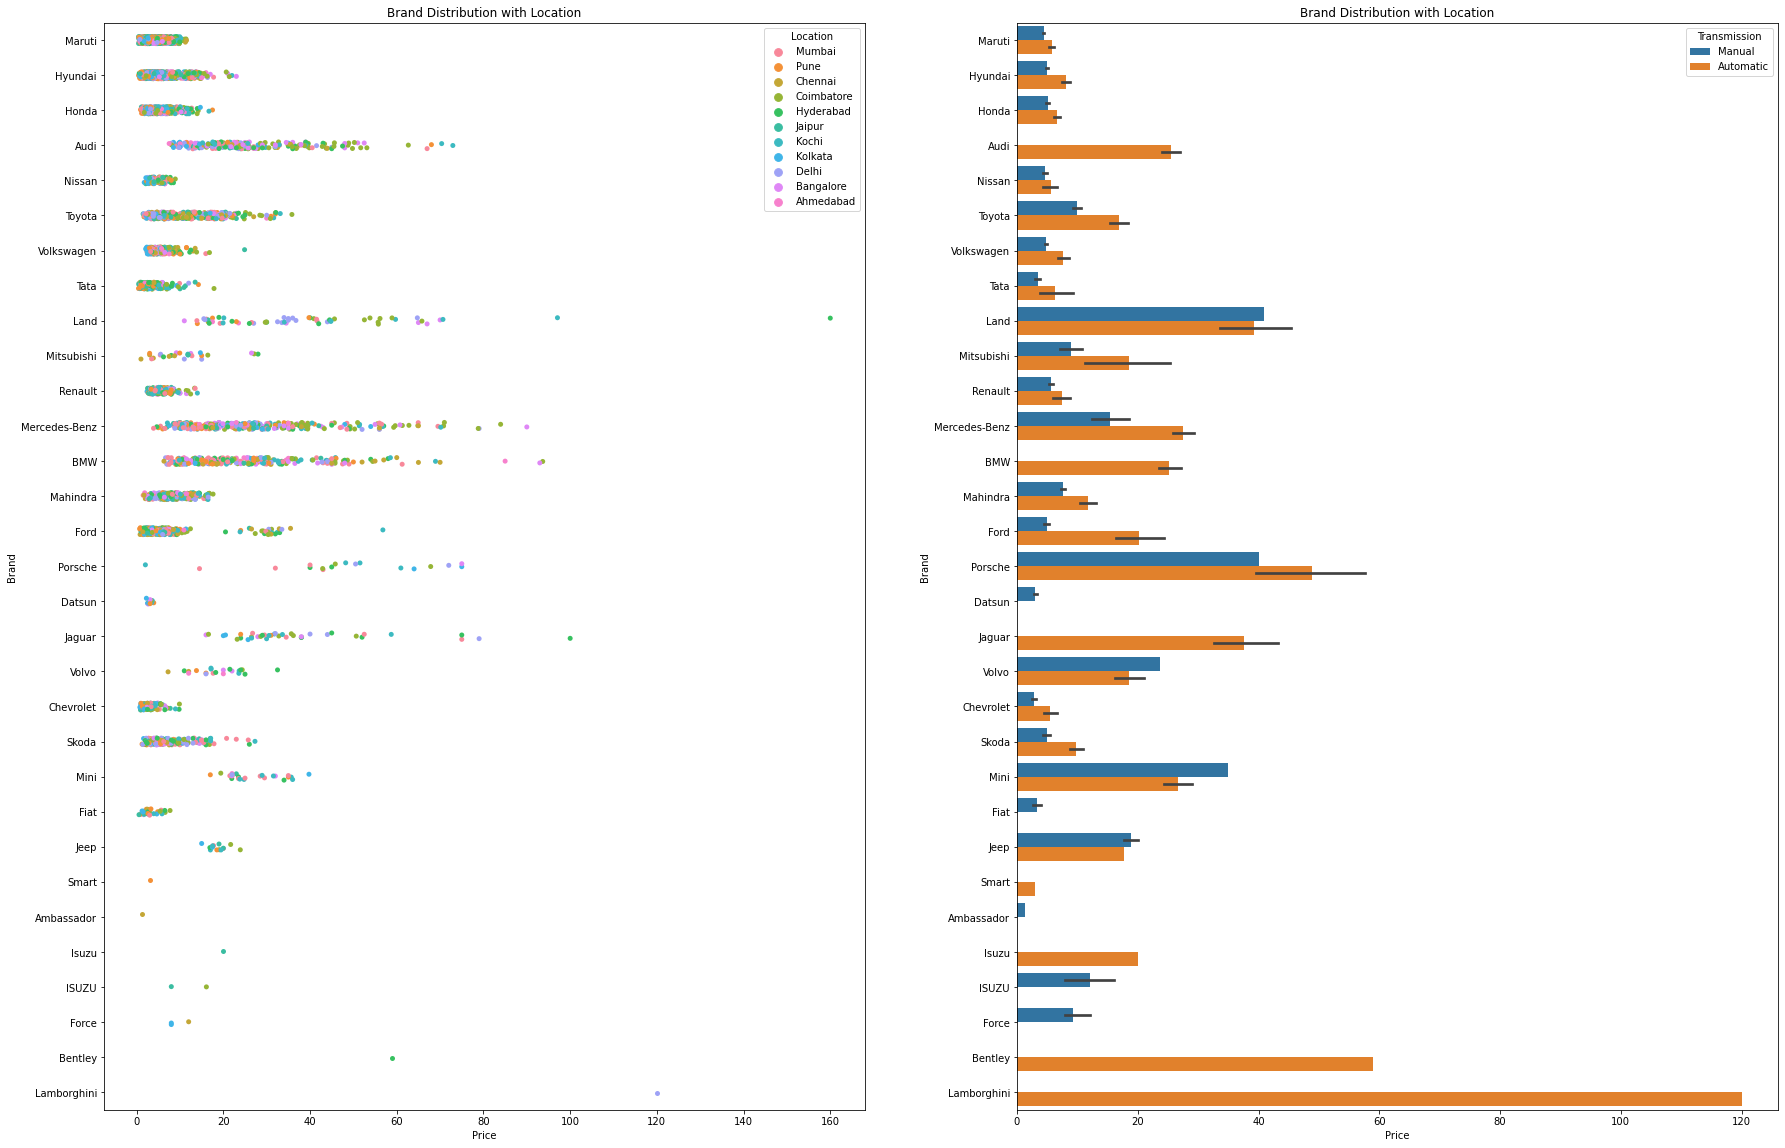

In [88]:
#Cars price based on their brand  with influence of location
plt.figure(figsize=(30,20))

plt.subplot(1,2,1)
plt.title("Brand Distribution with Location")
sb.stripplot(y=car_data['Brand'],x=car_data['Price'],hue=car_data['Location'])
plt.subplot(1,2,2)
plt.title("Brand Distribution with Location")
sb.barplot(y=car_data['Brand'],x=car_data['Price'],hue=car_data['Transmission'])


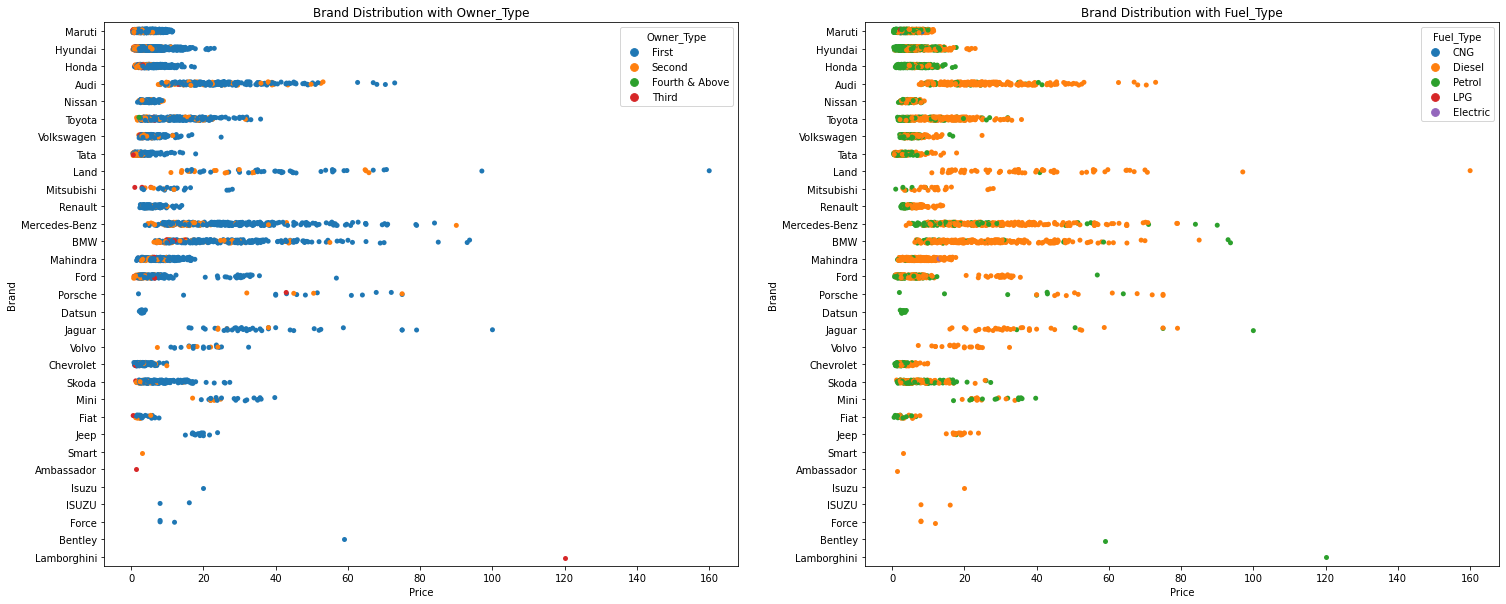

In [24]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.title("Brand Distribution with Owner_Type")
sb.stripplot(y=car_data['Brand'],x=car_data['Price'],hue=car_data['Owner_Type'])
plt.subplot(1,2,2)
plt.title("Brand Distribution with Fuel_Type")
sb.stripplot(y=car_data['Brand'],x=car_data['Price'],hue=car_data['Fuel_Type'])


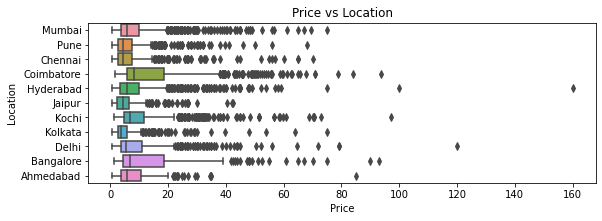

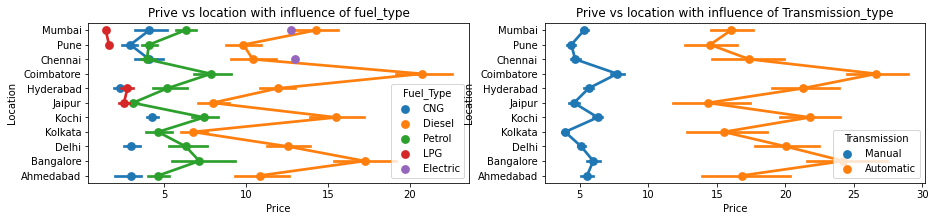

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
plt.title("Price vs Location")
sb.boxplot(y=car_data['Location'],x=car_data['Price'])
plt.figure(figsize=(15,10))
plt.subplot(3,2,3)
plt.title("Prive vs location with influence of fuel_type")
sb.pointplot(y=car_data['Location'],x=car_data['Price'],hue=car_data["Fuel_Type"])
plt.subplot(3,2,4)
plt.title("Prive vs location with influence of Transmission_type")
sb.pointplot(y=car_data['Location'],x=car_data['Price'],hue=car_data["Transmission"])


From the above graphs we can see that: 
1. Hyderabad made on sale with highest price, the mean sales were higher in coimbatore followed by bangalore and kochi.
2. Disel cars were sold for higher proce compared to others irrespective of location, only 2 electric cars were sold in Mumbai and chennai with relatively same price, LPG were sold at lowest price but not in hyderabad
3. Automatic cars were sold at more price irespective of the locations where they are sold.

Text(0.5, 1.0, 'Price vs location with influence of Owner_type')

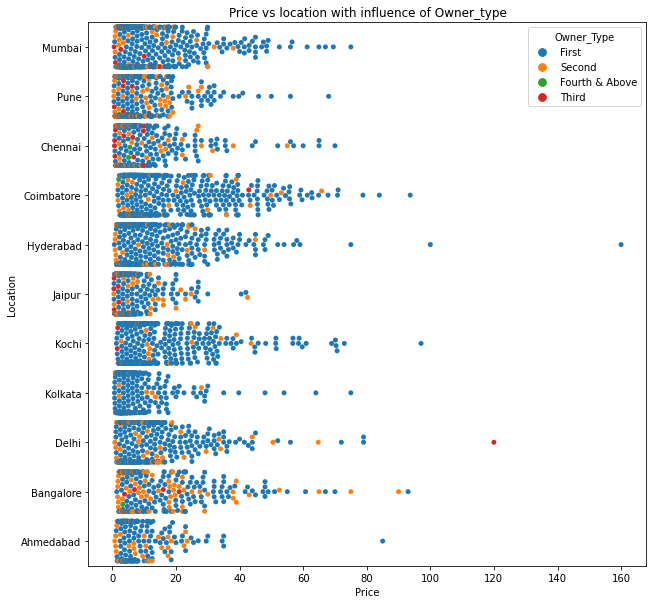

In [18]:

plt.figure(figsize=(10,10))
sb.swarmplot(y=car_data['Location'],x=car_data['Price'],hue=car_data["Owner_Type"])
plt.title("Price vs location with influence of Owner_type")


Form the above graph we can see that the first hand cars made more price, however the second hand cars also made higher price in bangalore.

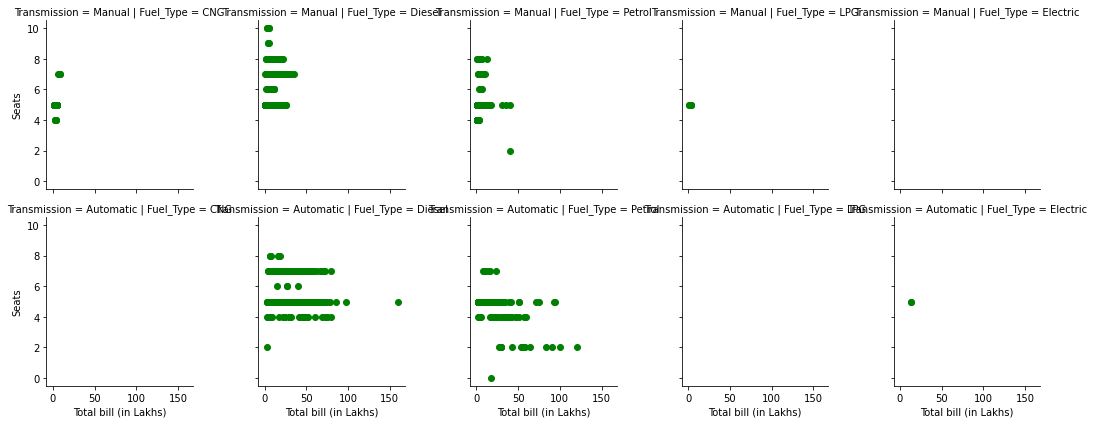

In [17]:
g = sb.FacetGrid(car_data, col="Fuel_Type", row="Transmission")
g = (g.map(plt.scatter, "Price", "Seats", color="g")
      .set_axis_labels("Total bill (in Lakhs)", "Seats"))

In [21]:
Owners = {'First': 1,'Second': 2,'Fourth & Above': 4, 'Third': 3}
car_data['Owners'] = [Owners[item] for item in car_data['Owner_Type']]
car_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Owners,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,1,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,1,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,1,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,1,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,2,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,1,Maruti
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,1,Hyundai
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,2,Mahindra
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,1,Maruti


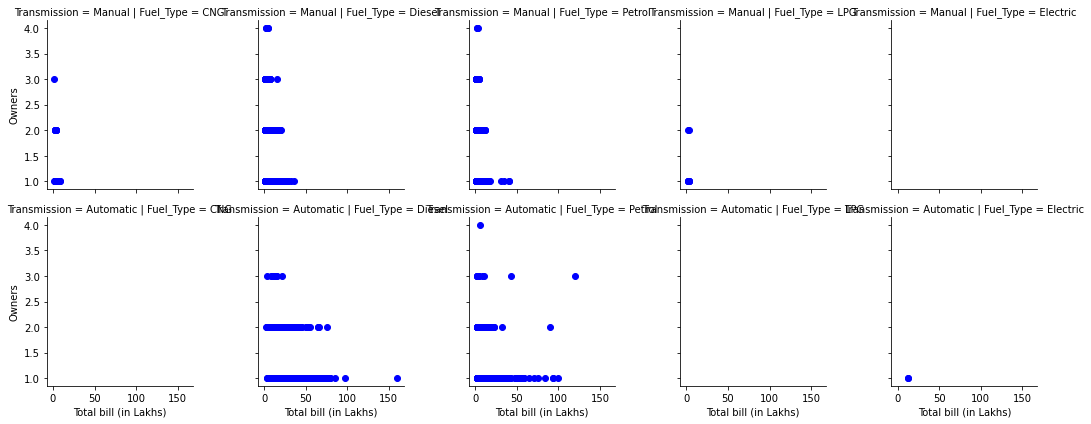

In [22]:
g = sb.FacetGrid(car_data, col="Fuel_Type", row="Transmission")
g = (g.map(plt.scatter, "Price", "Owners", color="b")
      .set_axis_labels("Total bill (in Lakhs)", "Owners"))

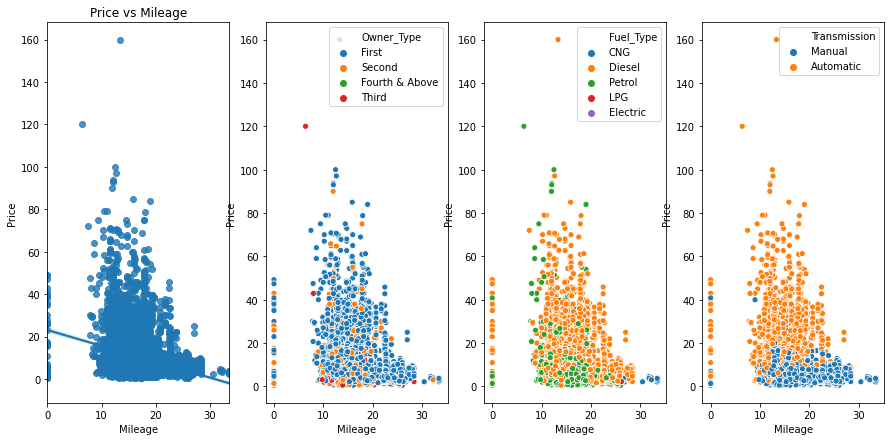

In [32]:
plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
sb.regplot(x=car_data['Mileage'],y=car_data['Price'])
plt.title("Price vs Mileage")
plt.subplot(1,4,2)
sb.scatterplot(x=car_data['Mileage'],y=car_data['Price'],hue=car_data['Owner_Type'])
plt.subplot(1,4,3)
sb.scatterplot(x=car_data['Mileage'],y=car_data['Price'],hue=car_data['Fuel_Type'])
plt.subplot(1,4,4)
sb.scatterplot(x=car_data['Mileage'],y=car_data['Price'],hue=car_data['Transmission'])

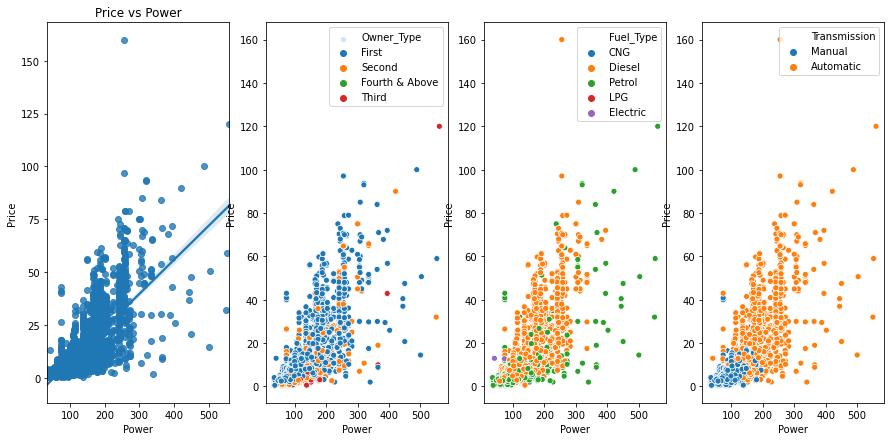

In [33]:
plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
sb.regplot(x=car_data['Power'],y=car_data['Price'])
plt.title("Price vs Power")
plt.subplot(1,4,2)
sb.scatterplot(x=car_data['Power'],y=car_data['Price'],hue=car_data['Owner_Type'])
plt.subplot(1,4,3)
sb.scatterplot(x=car_data['Power'],y=car_data['Price'],hue=car_data['Fuel_Type'])
plt.subplot(1,4,4)
sb.scatterplot(x=car_data['Power'],y=car_data['Price'],hue=car_data['Transmission'])

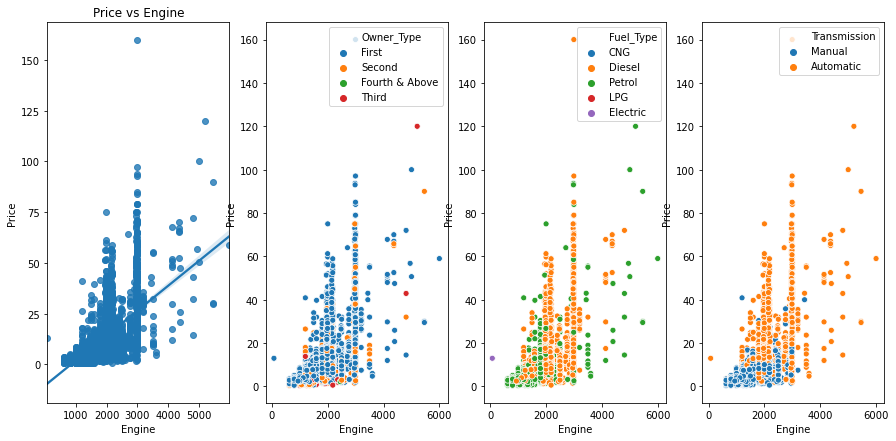

In [34]:
plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
sb.regplot(x=car_data['Engine'],y=car_data['Price'])
plt.title("Price vs Engine")
plt.subplot(1,4,2)
sb.scatterplot(x=car_data['Engine'],y=car_data['Price'],hue=car_data['Owner_Type'])
plt.subplot(1,4,3)
sb.scatterplot(x=car_data['Engine'],y=car_data['Price'],hue=car_data['Fuel_Type'])
plt.subplot(1,4,4)
sb.scatterplot(x=car_data['Engine'],y=car_data['Price'],hue=car_data['Transmission'])

The higher the power and engine the higher the price in general, where as the cars that gave a mileage between 10-20 were sold for higher price.